# California Housing Prices

<img src='https://managecasa.com/wp-content/uploads/2018/12/california-homes-on-hill.jpg' />

<img src="" />

## import important library : we will import other libraries when we need them
better way is to speculate what you will need and import exactly that thing for saving memory usage.

In [118]:
## import important library : we will import other libraries when we need them
better way is to speculate what you will need and import exactly that thing for saving memory usage.import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [119]:
os.listdir()

['.ipynb_checkpoints',
 'California Housing Prices.ipynb',
 'california-housing-prices (1).zip',
 'housing.csv']

In [120]:
data= pd.read_csv('housing.csv')

In [121]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## DATA WRANGLING

In [122]:
data.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [123]:
data.total_bedrooms.isnull().sum()

207

In [124]:
data.loc[data.total_bedrooms.isnull()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
738      -122.14     37.67                37.0       3342.0             NaN   
1097     -121.77     39.66                20.0       3759.0             NaN   
1350     -121.95     38.03                 5.0       5526.0             NaN   
1456     -121.98     37.96                22.0       2987.0             NaN   
1493     -122.01     37.94                23.0       3741.0             NaN   
1606     -122.08     37.88                26.0       2947.0             NaN   
2028     -119.75     36.71                38.0       1481.0             NaN   
2115     -119.72     36.76                23.0       6403.0             NaN   
2301     -119.78     36.82                25.0       5016.0             NaN   
2323     -119.73     36.83                 8.0       3602.0             NaN   
2334     -119.69     36.83                32.0       1098.0             NaN   
2351     -119.68     36.79                16.0       1551.0             NaN   
2412     -119.45     36.61                24.0       1302.0             NaN   
2420     -119.44     36.58                37.0       1054.0             NaN   
2578     -124.06     40.86                34.0       4183.0             NaN   
2608     -124.00     40.92                29.0       1429.0             NaN   
2647     -124.13     40.55                38.0        544.0             NaN   
2826     -119.11     35.42                52.0        154.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
3328     -122.72     38.88                29.0       2781.0             NaN   
3354     -120.67     40.50                15.0       5343.0             NaN   
3376     -118.28     34.25                29.0       2559.0             NaN   
3482     -118.45     34.30                27.0       2676.0             NaN   
3485     -118.55     34.28                16.0       8879.0             NaN   
3529     -118.53     34.26                18.0       3674.0             NaN   
...          ...       ...                 ...          ...             ...   
18466    -121.75     37.11                18.0       3167.0             NaN   
18786    -122.42     40.44                16.0        994.0             NaN   
18873    -122.22     38.08                37.0       2811.0             NaN   
18914    -122.22     38.15                 7.0       5129.0             NaN   
19060    -122.41     38.16                37.0       1549.0             NaN   
19071    -122.53     38.32                22.0       3577.0             NaN   
19122    -122.65     38.25                23.0       4030.0             NaN   
19150    -122.70     38.35                14.0       2313.0             NaN   
19252    -122.79     38.48                 7.0       6837.0             NaN   
19332    -122.91     38.46                18.0       2021.0             NaN   
19391    -120.85     37.78                25.0        421.0             NaN   
19402    -120.93     37.73                14.0       2799.0             NaN   
19485    -120.98     37.66                10.0        934.0             NaN   
19559    -120.98     37.60                36.0       1437.0             NaN   
19607    -121.02     37.48                26.0        467.0             NaN   
19638    -120.97     37.43                27.0       1380.0             NaN   
19766    -122.10     40.03                25.0       2516.0             NaN   
19818    -119.30     36.57                32.0        728.0             NaN   
19833    -119.38     36.53                38.0       1281

In [125]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [126]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [127]:
data.groupby(['ocean_proximity'])['total_bedrooms'].sum()

ocean_proximity
<1H OCEAN     4937435.0
INLAND        3468095.0
ISLAND           2102.0
NEAR BAY      1167195.0
NEAR OCEAN    1415482.0
Name: total_bedrooms, dtype: float64

In [128]:
data.groupby(['ocean_proximity'])['total_bedrooms'].mean()

ocean_proximity
<1H OCEAN     546.539185
INLAND        533.881619
ISLAND        420.400000
NEAR BAY      514.182819
NEAR OCEAN    538.615677
Name: total_bedrooms, dtype: float64

In [129]:
x=4937435/9136
x

540.4372810858143

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

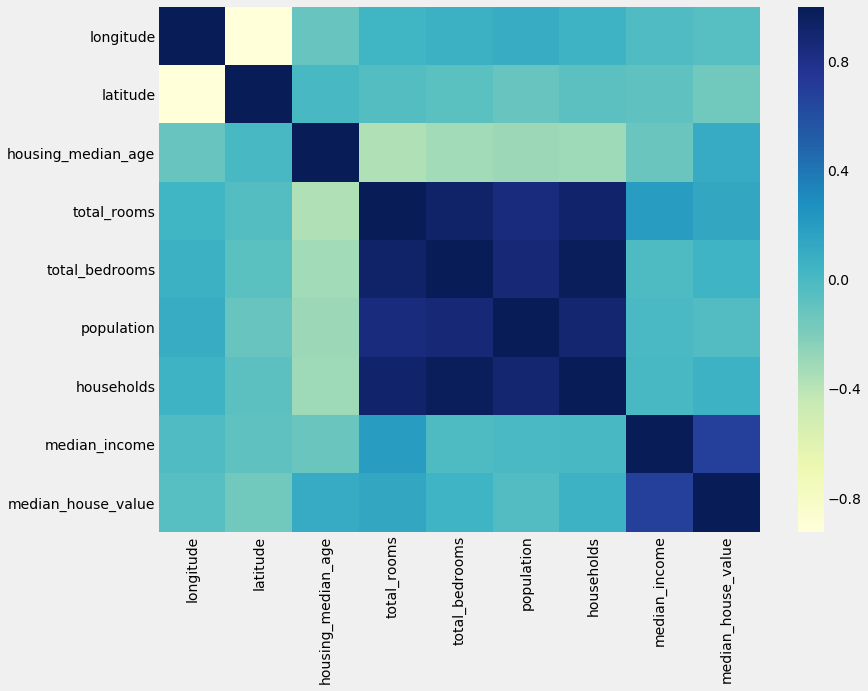

In [131]:
corr = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr,cmap="YlGnBu")

In [132]:
data.groupby(['ocean_proximity'])['total_bedrooms'].median()

ocean_proximity
<1H OCEAN     438.0
INLAND        423.0
ISLAND        512.0
NEAR BAY      423.0
NEAR OCEAN    464.0
Name: total_bedrooms, dtype: float64

## DATA CLEANING

In [133]:
## DATA CLEANINGdata.loc[(data.total_bedrooms.isnull())&(data.ocean_proximity=='<1H OCEAN'), 'total_bedrooms']=438.0
data.loc[(data.total_bedrooms.isnull())&(data.ocean_proximity=='INLAND'),'total_bedrooms']=423.0
data.loc[(data.total_bedrooms.isnull())&(data.ocean_proximity=='ISLAND'),'total_bedrooms']=512.0
data.loc[(data.total_bedrooms.isnull())&(data.ocean_proximity=='NEAR BAY'),'total_bedrooms']=423.0
data.loc[(data.total_bedrooms.isnull())&(data.ocean_proximity=='NEAR OCEAN'),'total_bedrooms']=464.0

In [134]:
data.total_bedrooms.isnull().sum()

0

C:\Users\ernag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


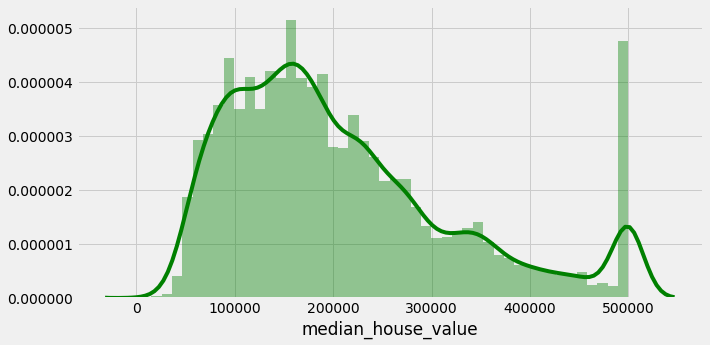

In [135]:
# next 3 figures are learned from https://www.kaggle.com/manisood001/california-housing-optimised-modelling kernel 
plt.figure(figsize=(10,5))
sns.distplot(data['median_house_value'],color='green')
plt.show()

[]

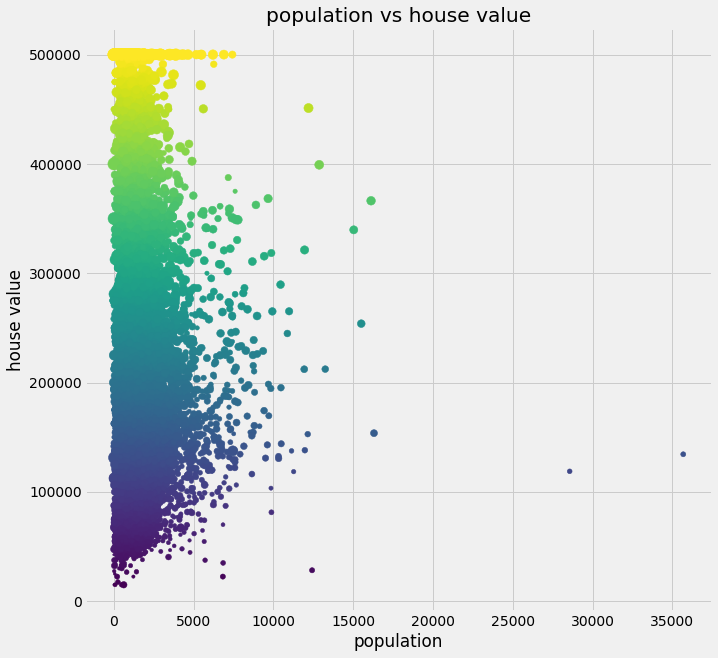

In [136]:
plt.figure(figsize=(10,10))

plt.scatter(data['population'],data['median_house_value'],c=data['median_house_value'], s=data['median_income']*10)
plt.colorbar
plt.title('population vs house value' )
plt.xlabel('population')
plt.ylabel('house value')
plt.plot()

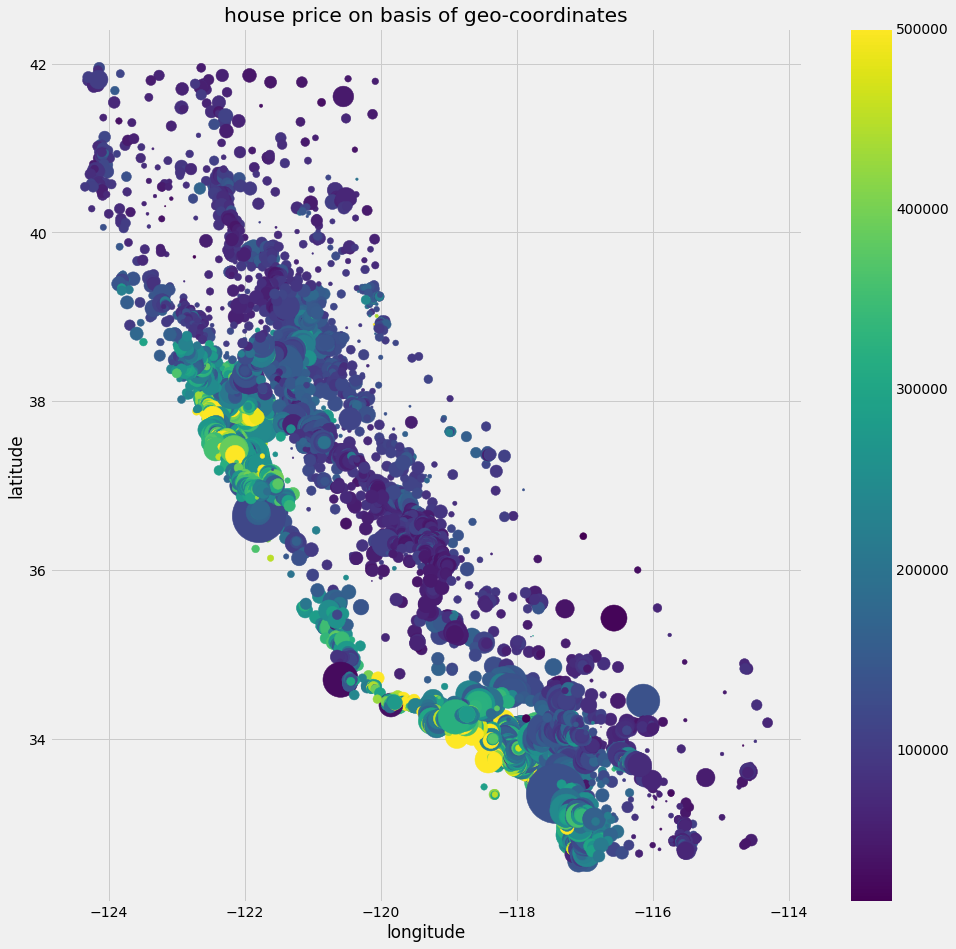

In [137]:
# s=size of circles, c= color of circles
plt.figure(figsize=(15,15))
plt.scatter(data['longitude'],data['latitude'],c=data['median_house_value'],s=data['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house price on basis of geo-coordinates')
plt.show()

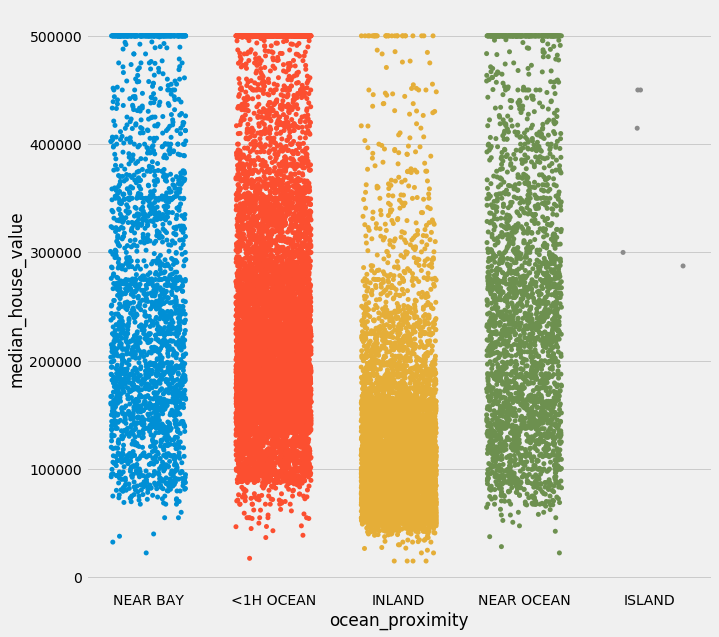

In [138]:
plt.figure(figsize=(10,10))

sns.stripplot(data=data,x='ocean_proximity',y='median_house_value',jitter=0.3)

## ONE HOT ENCODING 

In [139]:
data = pd.get_dummies(data)

In [140]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         1                           0  
1                         1                           0  
2                         1                           0  
3                         1                           0  
4                         1                           0

In [141]:
y=data.pop('median_house_value')

# Train Test Split : for checking RMSE 

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

In [144]:
X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5088     -118.28     33.98                19.0        883.0           313.0   
17096    -122.23     37.46                33.0       2643.0           464.0   
5617     -118.26     33.79                42.0       1162.0           264.0   
20060    -119.26     35.87                24.0       1590.0           390.0   
895      -121.96     37.54                14.0       5106.0          1207.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
5088        726.0       277.0         0.9809                          1   
17096      1015.0       427.0         4.2232                          0   
5617       1044.0       241.0         3.5488                          1   
20060      1686.0       372.0         1.6469                          0   
895        2738.0      1108.0         3.9909                          1   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
5088                        0                       0   
17096                       0                       0   
5617                        0                       0   
20060                       1                       0   
895                         0                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
5088                          0                           0  
17096                         0                           1  
5617                          0                           0  
20060                         0                           0  
895                           0                           0

## Predictive Modeling (Using API)

### importing all of Algoriths that we want to use
#### Linear_model: 
<font color=blue> Lasso, Ridge 
    
#### Neighbors:
<font color=red> KNeighborsRegressor
<font color=black>
    
    
#### Tree:
<font color=blue> DecisionTreeRegressor
<font color=black>
    
#### Neural network:
<font color=red> MLPRegressor 
<font color=black>
    
#### Ensemble:
<font color=black> GradientBoostingRegressor

name=['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'Lasso Regression CV','Elastic Net Regression','Elastic Net Regression CV','SGD Regression','SGD Regression CV',
     'SVM','SVM CV','Decision Tree','Decision Tree Regression','Random Forest','Random Forest CV','Ada Boost','Ada Boost CV',
     'Bagging','Bagging CV','Gradient Boost','Gradient Boost CV']

In [145]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

In [146]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor   
from sklearn.ensemble import  GradientBoostingRegressor

## LOOP FOR FITTING AND PREDICTING USING ALL MODEL (API) 

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
model= [LinearRegression(), DecisionTreeRegressor() ,   Lasso(), Ridge(),  MLPRegressor(), GradientBoostingRegressor()  ]
name = ['LinearRegression','DecisionTreeRegressor','Lasso','Ridge','MLPRegressor','GradientBoostingRegressor']
SCORE= []
TESTING=[]
RSME=[]
for ku in model:
    #ku will be replaced with each model like as first one is LogisticRegression()
    algorithm = ku.fit(X_train,y_train)
    print(ku)
    #now 'algorithm' will be fitted by API with above line and next line will check score with data training and testing
    predict_ku=ku.predict(X_test)
    print('RSME: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,predict_ku))))
    score=cross_val_score(ku,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
    ku_score_cross=np.sqrt(-score)
    
    print('mean: {:.2f} and std:{:.2f}'.format(np.mean(ku_score_cross),np.std(ku_score_cross)))
    print('---'*10)
    print('training set accuracy: {:.2f}'.format(algorithm.score(X_train,y_train)))
    print('test set accuracy: {:.2f}'.format(algorithm.score(X_test,y_test)))
    print('---'*30)
    #Now we are making a dataframe where by each loop the dataframe is added by SCORE,TESTING
    RSME.append(np.sqrt(mean_squared_error(y_test,predict_ku)))
    SCORE.append(algorithm.score(X_train,y_train))
    TESTING.append(algorithm.score(X_test,y_test))
models_dataframe=pd.DataFrame({'training score':SCORE,'testing score':TESTING,'RSME':RSME},index=name)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
RSME: 69154.1577
mean: 68792.53 and std:3390.69
------------------------------
training set accuracy: 0.65
test set accuracy: 0.64
------------------------------------------------------------------------------------------
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RSME: 69595.4965
mean: 69182.63 and std:3538.79
------------------------------
training set accuracy: 1.00
test set accuracy: 0.64
------------------------------------------------------------------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cy

#### MODEL COMPARISON
SEEING IN ASCENDING ORDER FOR EASIER COMPARISON

In [153]:
models_dataframe

training score  testing score          RSME
LinearRegression                 0.646525       0.641128  69154.157678
DecisionTreeRegressor            1.000000       0.636533  69595.496510
Lasso                            0.646525       0.641123  69154.638685
Ridge                            0.646506       0.641078  69158.942204
MLPRegressor                     0.285970       0.269881  98638.275954
GradientBoostingRegressor        0.790262       0.768475  55545.319343

In [154]:
asendingtraining = models_dataframe.sort_values(by='RSME', ascending=False)
asendingtraining 

training score  testing score          RSME
MLPRegressor                     0.285970       0.269881  98638.275954
DecisionTreeRegressor            1.000000       0.636533  69595.496510
Ridge                            0.646506       0.641078  69158.942204
Lasso                            0.646525       0.641123  69154.638685
LinearRegression                 0.646525       0.641128  69154.157678
GradientBoostingRegressor        0.790262       0.768475  55545.319343

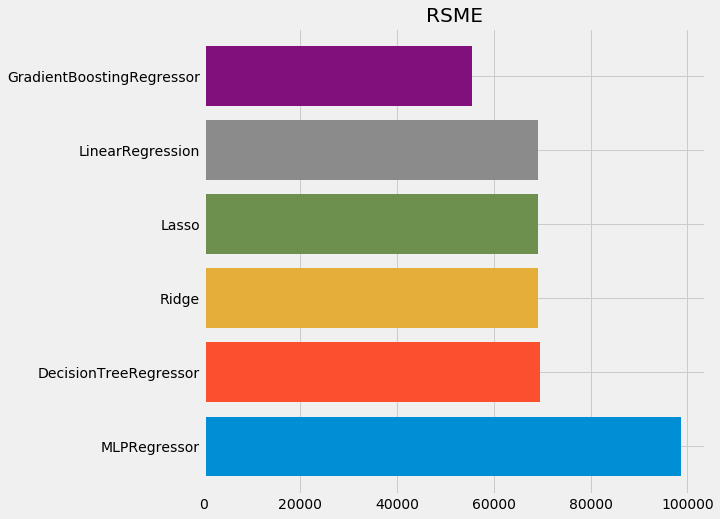

In [155]:
asendingtraining['RSME'].plot.barh(width=0.8)
plt.title('RSME')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

#### Any model will not be able to predict random noise in the data, so the predictive capability of the model can be no better than that noise. If it is better, then you are overfitting the noise. This is a bad thing to do

we can remove outlier for changing rmse and change algorithms parameters